## Import Data

* Create '**document**' which contains the script of each speech and index number. 








In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/s853348481/MDA/main/MDA_datasets/speeches_df.csv");
documents = data[['content']]
documents['index'] = documents.index

documents.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,content,index
0,"On behalf of the great state of Illinois, cro...",0
1,"Senator Obama: Thank you very much, Mr. Presi...",1
2,"Good morning President Taylor, Board of Trust...",2
3,"] Mr. President, today the nation mourns a gen...",3
4,"Thank you very much, Mr. President. You know,...",4


## Text Cleaning

* Import libaries
* Build Text-cleaning pipeline
  * remove stopwords 
  * remove words that has length <3
  * lematize and stemming
* Take a look of the change: 
    * Original document vs After-cleaning document 
* Apply pipeline
* Get '**processed_docs**'

In [ ]:
###
import nltk
stemmer = nltk.PorterStemmer()
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
###
from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from nltk.stem.porter import *
nltk.download('omw-1.4')
import numpy as np
np.random.seed(2018)

nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#pipeline
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
doc_sample = documents[documents['index'] == 200].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words[:10])
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample)[:10])

original document: 
['', 'Thank', 'you,', 'everybody.', 'Please', '--', 'Please', 'have', 'a', 'seat.']


 tokenized and lemmatized document: 
['thank', 'everybodi', 'seat', 'good', 'afternoon', 'everybodi', 'begin', 'thank', 'vice', 'presid']


In [ ]:
processed_docs = documents['content'].map(preprocess)
processed_docs[:10]

0    [behalf, great, state, illinoi, crossroad, nat...
1    [senat, obama, thank, presid, ladi, gentlemen,...
2    [good, morn, presid, taylor, board, truste, fa...
3    [presid, today, nation, mourn, genuin, america...
4    [thank, presid, know, year, follow, devast, at...
5    [edit, continu, thank, presid, today, mourn, p...
6    [presid, rise, today, humbl, honor, opportun, ...
7    [know, month, think, hard, plan, run, presid, ...
8    [hello, springfield, look, look, good, thank, ...
9    [presid, rise, offer, strong, word, support, s...
Name: content, dtype: object

## LDA Model

* Preparation before running LDA model
  * Create '**dictionary**', which tags each word with ID based on its location.
  * Remove words that appear less tha 50% but more than 2 different speeches.
  * Create '**bow_corpus**', which includes dict_ID and frequency.
* Fit the model and see the result
  * Baseline LDA model
  * TF-IDF LDA model

In [ ]:
#
dictionary = gensim.corpora.Dictionary(processed_docs)
from itertools import islice
def take(n, iterable):
   return list(islice(iterable, n))
take(10,dictionary.items())
#
dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=1000)
#
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0][:5]

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1)]

In [ ]:
#Take a look
bow_doc_200 = bow_corpus[200]
for i in range(5):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_200[i][0], 
                                               dictionary[bow_doc_200[i][0]], 
                                                bow_doc_200[i][1]))

Word 0 ("abid") appears 1 time.
Word 1 ("absolut") appears 1 time.
Word 3 ("act") appears 1 time.
Word 11 ("assembl") appears 1 time.
Word 15 ("base") appears 1 time.


In [ ]:
#
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break
#fits baseline LDA_model
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=dictionary, passes=2, workers=2,random_state=np.random.RandomState(10))
#Topics
#for idx, topic in lda_model.print_topics(-1):
#    print('Topic: {} \nWords: {}'.format(idx, topic))

[(0, 0.05189120335306464), (1, 0.03383087108391299), (2, 0.041103149519155856), (3, 0.03679045298773211), (4, 0.021948628035838847), (5, 0.028693190755155848), (6, 0.04637623305679332), (7, 0.04705329123813214), (8, 0.05821071900661312), (9, 0.034048031700308144), (10, 0.04739788990887433), (11, 0.045389611425957016), (12, 0.04845716210596454), (13, 0.051091884034613975), (14, 0.05443170349539553), (15, 0.024180261144933993), (16, 0.02659963891784939), (17, 0.06124658670857089), (18, 0.028693190755155848), (19, 0.17243666262432103), (20, 0.07682203778090559), (21, 0.08582586236333725), (22, 0.051091884034613975), (23, 0.04918564772743305), (24, 0.04035989987338828), (25, 0.05771029517427589), (26, 0.028333515508175172), (27, 0.09142948163708114), (28, 0.11696510702760696), (29, 0.1024293837078741), (30, 0.04683397946055818), (31, 0.06499121440003001), (32, 0.024335375510303126), (33, 0.027108920267600825), (34, 0.029426316912896464), (35, 0.07633572136627712), (36, 0.04321110633800207)

In [ ]:
#Topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.008*"democraci" + 0.006*"faith" + 0.005*"global" + 0.005*"societi" + 0.004*"immigr" + 0.004*"muslim" + 0.004*"elect" + 0.004*"civil" + 0.004*"stori" + 0.004*"choos"
Topic: 1 
Words: 0.008*"veteran" + 0.006*"properti" + 0.006*"reserv" + 0.006*"compani" + 0.006*"energi" + 0.005*"ccoomm" + 0.005*"folk" + 0.005*"iraq" + 0.005*"militari" + 0.004*"obama"
Topic: 2 
Words: 0.013*"obama" + 0.009*"israel" + 0.007*"nuclear" + 0.006*"republican" + 0.006*"insur" + 0.005*"china" + 0.005*"energi" + 0.005*"reform" + 0.005*"intern" + 0.005*"actual"
Topic: 3 
Words: 0.009*"iran" + 0.009*"obama" + 0.008*"militari" + 0.007*"deal" + 0.007*"isil" + 0.007*"intern" + 0.007*"nuclear" + 0.007*"terrorist" + 0.006*"region" + 0.005*"weapon"
Topic: 4 
Words: 0.008*"school" + 0.006*"colleg" + 0.006*"student" + 0.005*"obama" + 0.005*"iraq" + 0.005*"class" + 0.005*"worker" + 0.004*"program" + 0.004*"folk" + 0.004*"high"
Topic: 5 
Words: 0.012*"insur" + 0.010*"obama" + 0.007*"governor" + 0.006*"vote"

In [ ]:
#fits LDA_model_tfidf
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=6, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"isil" + 0.005*"obama" + 0.004*"insur" + 0.003*"republican" + 0.003*"immigr" + 0.003*"copyright" + 0.003*"deficit" + 0.003*"syria" + 0.003*"terrorist" + 0.003*"properti"
Topic: 1 Word: 0.005*"africa" + 0.004*"king" + 0.004*"african" + 0.004*"father" + 0.003*"black" + 0.003*"school" + 0.003*"stori" + 0.003*"justic" + 0.003*"south" + 0.003*"march"
Topic: 2 Word: 0.005*"insur" + 0.005*"energi" + 0.004*"colleg" + 0.004*"tonight" + 0.004*"veteran" + 0.004*"student" + 0.003*"compani" + 0.003*"school" + 0.003*"ccoomm" + 0.003*"reserv"
Topic: 3 Word: 0.005*"muslim" + 0.004*"tragedi" + 0.004*"israel" + 0.004*"iraq" + 0.003*"prayer" + 0.003*"governor" + 0.003*"tonight" + 0.003*"wound" + 0.003*"islam" + 0.003*"qaeda"
Topic: 4 Word: 0.011*"iran" + 0.007*"nuclear" + 0.007*"veteran" + 0.006*"tonight" + 0.004*"sanction" + 0.003*"weapon" + 0.003*"deal" + 0.003*"kennedi" + 0.003*"insur" + 0.003*"obama"
Topic: 5 Word: 0.009*"israel" + 0.004*"afghan" + 0.004*"afghanistan" + 0.004*"fa

## Topics Visualization

* Create two table based on result of LDA model
  * table1 shows:
    * Speech No.
    * Corresponding dominant topic No.
    * Percent of contribution of dominant topic
    * keywords and Text
  * table2 shows:
    * Topic No.
    * Keyword
    * Most represitve text (Most examplar sentense for each topic)
* Vistualization
  * Frenquency of the topic as the dominant topic 
  * Word-Cloud with the size of the words proportional to the weight
  * Change of topics along with time
  * pyLDAvis
    * Each bubble represents a topic. The larger the bubble, the higher percentage of the number of tweets in the corpus is about that topic.
    * Blue bars represent the overall frequency of each word in the corpus.
    * Red bars give the estimated number of times a given term was generated by a given topic.
    * The further the bubbles are away from each other, the more different they are

In [ ]:
#generate Table 1
def format_topics_sentences(ldamodel=None, corpus=bow_corpus, texts=data):    
    sent_topics_df = pd.DataFrame()    
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=processed_docs)
  #Changes columns name
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(100)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.6319,"democraci, faith, global, societi, immigr, mus...","[behalf, great, state, illinoi, crossroad, nat..."
1,1,0.0,0.6959,"democraci, faith, global, societi, immigr, mus...","[senat, obama, thank, presid, ladi, gentlemen,..."
2,2,4.0,0.6843,"school, colleg, student, obama, iraq, class, w...","[good, morn, presid, taylor, board, truste, fa..."
3,3,0.0,0.7417,"democraci, faith, global, societi, immigr, mus...","[presid, today, nation, mourn, genuin, america..."
4,4,5.0,0.4670,"insur, obama, governor, vote, republican, folk...","[thank, presid, know, year, follow, devast, at..."
...,...,...,...,...,...
95,95,5.0,0.5414,"insur, obama, governor, vote, republican, folk...","[thank, board, member, honor, guest, love, lad..."
96,96,0.0,0.7739,"democraci, faith, global, societi, immigr, mus...","[thank, everybodi, seat, good, morn, everybodi..."
97,97,0.0,0.5102,"democraci, faith, global, societi, immigr, mus...","[good, morn, wonder, unit, state, militari, ac..."
98,98,1.0,0.5622,"veteran, properti, reserv, compani, energi, cc...","[good, afternoon, everybodi, question, want, u..."


In [ ]:
#generate Table2
pd.options.display.max_colwidth = 100
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)   
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
sent_topics_sorteddf_mallet.head(10)


,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9992,"democraci, faith, global, societi, immigr, muslim, elect, civil, stori, choos","[thank, thank, madam, chairwoman, dlamini, zuma, thank, kind, word, leadership, prime, minist, h..."
1,1.0,0.9988,"veteran, properti, reserv, compani, energi, ccoomm, folk, iraq, militari, obama","[hello, legionnair, wonder, thank, command, foster, introduct, lifetim, servic, fellow, marin, s..."
2,2.0,0.9275,"obama, israel, nuclear, republican, insur, china, energi, reform, intern, actual","[presid, obama, good, afternoon, everybodi, seat, want, welcom, presid, white, hous, host, year,..."
3,3.0,0.9992,"iran, obama, militari, deal, isil, intern, nuclear, terrorist, region, weapon","[presid, obama, presid, holland, honor, welcom, white, hous, happier, time, american, stand, fri..."
4,4.0,0.9990,"school, colleg, student, obama, iraq, class, worker, program, folk, high","[everybodi, seat, thank, wonder, introduct, david, thank, great, work, appreci, warm, welcom, ge..."
5,5.0,0.9997,"insur, obama, governor, vote, republican, folk, compani, percent, afford, money","[microsoft, word, obama, romney, live, debat, barack, obama, mitt, romney, presidenti, candid, d..."


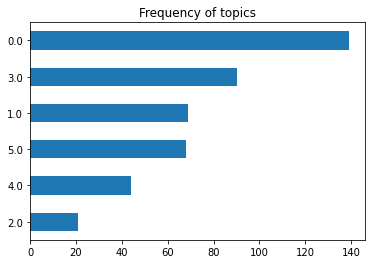

In [ ]:
#Frequency Table
import matplotlib.pyplot as plt
df_dominant_topic["Dominant_Topic"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of topics")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


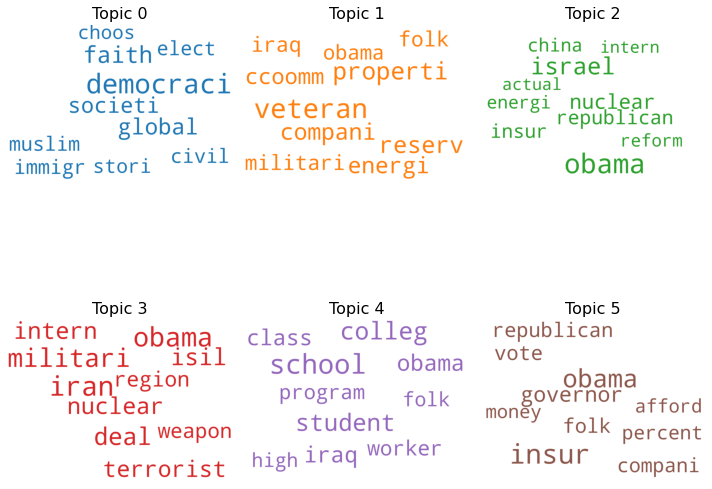

In [ ]:
# 1. Wordcloud of Top N words in each topic
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(2, 3, figsize=(10,10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
#data_visual

#df2 = documents.groupby(['topic','year']).size().unstack(fill_value=0).stack().to_frame().reset_index()
#df2.columns = ['topic','year','count']
#count1 = list(df2[df2['topic']==0]['count'])
#count2 = list(df2[df2['topic']==1]['count'])
#count3 = list(df2[df2['topic']==2]['count'])
#count4 = list(df2[df2['topic']==3]['count'])
#count5 = list(df2[df2['topic']==4]['count'])
#count6 = list(df2[df2['topic']==5]['count'])

#year = list(df2[df2['topic']==1]['year'])
#plt.plot(year,count1,label='topic0:Military')
#plt.plot(year,count2,label='topic1:Immigration')
#plt.plot(year,count3,label='topic2:Health Insurance')
#plt.plot(year,count4,label='topic3:Military')
#plt.plot(year,count5,label='topic4:Edu. and job')
#plt.plot(year,count6,label='topic5:Nuclear')
#plt.legend()
#plt.show()


KeyError: ignored

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 9.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=dfd1e529419db367e5019e673294a474b296449cc70d26b8d0dd485205a9c8e1
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
#pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model,bow_corpus,dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.031893 -0.014179       1        1  24.498835
0      0.004671  0.031362       2        1  23.156536
5     -0.030349 -0.012617       3        1  20.361578
1      0.006246 -0.000352       4        1  11.891493
4     -0.011261  0.007956       5        1  11.443723
2     -0.001200 -0.012170       6        1   8.647835, topic_info=         Term         Freq        Total Category  logprob  loglift
706    israel   437.000000   437.000000  Default  30.0000  30.0000
663     insur   969.000000   969.000000  Default  29.0000  29.0000
256     obama  1687.000000  1687.000000  Default  28.0000  28.0000
686   veteran   435.000000   435.000000  Default  27.0000  27.0000
374   nuclear   831.000000   831.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
90   governor    71.003340   640.410660   Topic6  -5.6615   0.2485
313   develop    73.891666   698.376718   Topic6  -5.6216   0.2017
388   program    73.295951   767.312819   Topic6  -5.6297   0.0995
691    weapon    67.124034   627.820683   Topic6  -5.7176   0.2121
85       folk    67.555922   859.995717   Topic6  -5.7112  -0.0961

[374 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
283       1  0.190677  actual
283       2  0.136857  actual
283       3  0.347524  actual
283       4  0.086112  actual
283       5  0.098414  actual
...     ...       ...     ...
229       2  0.480149   youth
229       3  0.167008   youth
229       4  0.052190   youth
229       5  0.093942   youth
229       6  0.073066   youth

[1554 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 2, 5, 3])

## Sentiment Analysis


* Use textblob to generate two features for each speech
  * polarity [-1,1]
    * smaller than 0  => negative
    * bigger than 0 => positive
      * bigger than 0 & smaller than 0.15 (median) => less postive
      * equal to 0.15 => positive
      * bigger than 0.15 =>very positive
  * subjectivity [0,1]
    * smaller than 0.5  => objective
    * bigger than 0.5 => subjective



In [ ]:
#use Textblob to generate two features 'polarity' and 'subjectivity'
from textblob import TextBlob
list_do=range(len(documents))
documents["polarity"]=list_do
documents["subjectivity"]=list_do
i=0
for i in range(0,len(documents)):
  a=TextBlob(documents["content"][i]).sentiment.polarity
  format_float = "{:.2f}".format(a)
  documents["polarity"][i]=format_float
  a=TextBlob(documents["content"][i]).sentiment.subjectivity
  format_float = "{:.2f}".format(a)
  documents["subjectivity"][i]=format_float
documents["date"] =data[['date']]
documents.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,content,index,polarity,subjectivity,date
0,"On behalf of the great state of Illinois, crossroads of a nation, Land of Lincoln, let me expre...",0,0.15,0.41,27 Jul 2004
1,"Senator Obama: Thank you very much, Mr. President; Ladies and Gentlemen of the Senate: I have t...",1,0.18,0.57,06 Jan 2005
2,"Good morning President Taylor, Board of Trustees, faculty, parents, family, friends, the commun...",2,0.14,0.46,04 Jun 2005
3,"] Mr. President, today the nation mourns a genuine American hero. As most of you know, Rosa Park...",3,0.09,0.45,25 Oct 2005
4,"Thank you very much, Mr. President. You know, four years ago, following the most devastating at...",4,0.09,0.47,15 Dec 2005


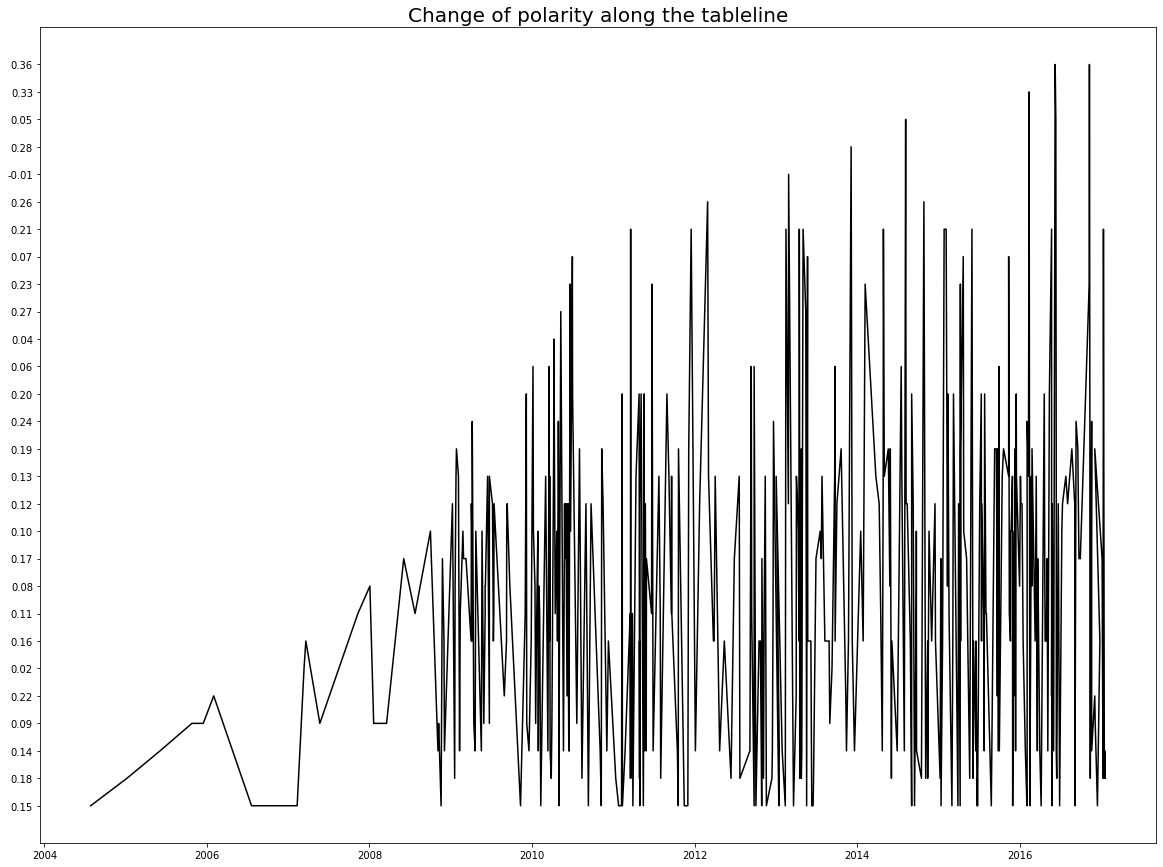

In [ ]:
#import datetime as dt
#import matplotlib.dates as mdates
#extract date
#dates = [dt.datetime.strptime(d,'%d %b %Y').date() for d in documents.iloc[:,4]]
#figure size
#plt.plot(dates, documents['polarity'], 'black', label = 'polarity')
#plt.title('Change of polarity along the tableline', fontsize=20)
#plt.rcParams['figure.figsize'] = [20,15]
#plt.show()

In [ ]:
#Feature Engineering and visualzation
  #sentiment
documents["sentiment"]=list_do
documents.head()
for i in range(0,len(documents)):
  documents['polarity'].iloc[i]=float(documents['polarity'].iloc[i])
  if documents["polarity"].iloc[i] < 0.15:
    documents["sentiment"].iloc[i]='less positive'
  elif documents["polarity"].iloc[i] == 0.15:
    documents["sentiment"].iloc[i]='positive'
  else :
    documents["sentiment"].iloc[i]='very positive'
  #'dominant topics'
documents["topic"] =list_do
documents["topic"]=df_dominant_topic["Dominant_Topic"]
  #'year'
documents['date'] = pd.to_datetime(documents['date'])
documents['year'] = documents['date'].dt.year

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(item, np.float) and np.float.is_integer(item):
/usr/local/lib/python3.7/dist-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifica

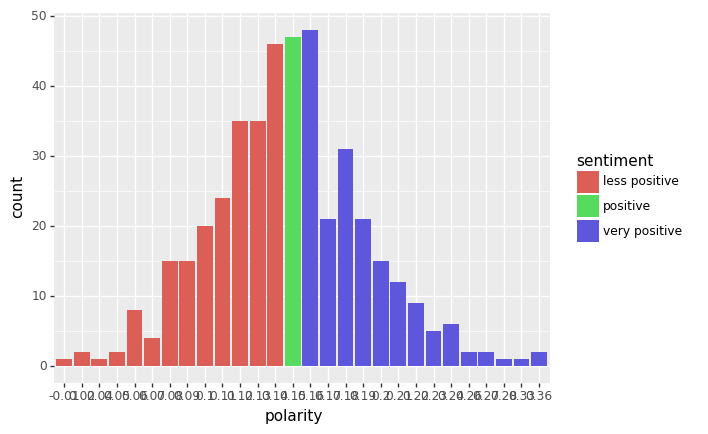

<ggplot: (8769796008861)>

In [ ]:
from plotnine import ggplot, aes, geom_bar, geom_text, geom_density
#The median value of polarity 0.15 seprates dataset into two parts with similar size
ggplot(documents)+aes(x ='polarity',fill = 'sentiment')+geom_bar(stat = "count")

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_density.py:137: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.asarray(x, dtype=np.float)
/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/kde.py:487: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar

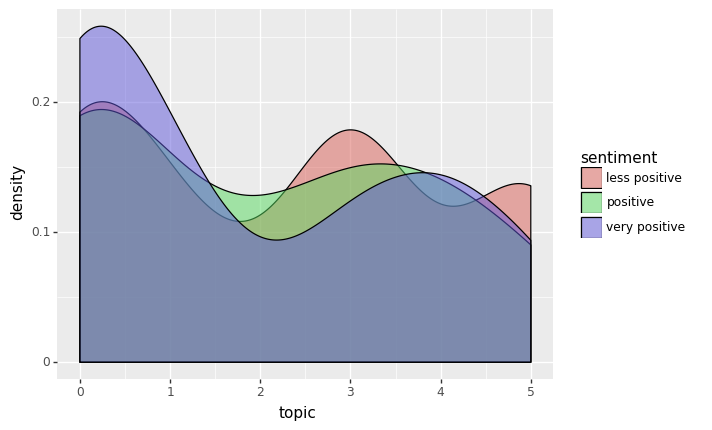

<ggplot: (8769795342065)>

In [ ]:
#polarity catogories of each topics 
ggplot(documents)+aes(x = 'topic',fill = 'sentiment' )+geom_density(alpha =0.5)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import string
import re

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
#Topic0 
topic0=lda_model.print_topics(-1)[0][1]
wik=TextBlob(topic0)
topic0_str=[]
for i in range(1,20,2):
  topic0_str.append(wik.words[i])
  print(wik.words[i])
print(topic0_str)

democraci
faith
global
societi
immigr
muslim
elect
civil
stori
choos
['democraci', 'faith', 'global', 'societi', 'immigr', 'muslim', 'elect', 'civil', 'stori', 'choos']


In [ ]:
#Topic01
topic1=lda_model.print_topics(-1)[1][1]
wik=TextBlob(topic1)
topic1_str=[]
for i in range(1,20,2):
  topic1_str.append(wik.words[i])
  print(wik.words[i])
print(topic1_str)

veteran
properti
reserv
compani
energi
ccoomm
folk
iraq
militari
obama
['veteran', 'properti', 'reserv', 'compani', 'energi', 'ccoomm', 'folk', 'iraq', 'militari', 'obama']


In [ ]:
#
documents

,content,index,polarity,subjectivity
0,"On behalf of the great state of Illinois, crossroads of a nation, Land of Lincoln, let me expre...",0,0.15,0.41
1,"Senator Obama: Thank you very much, Mr. President; Ladies and Gentlemen of the Senate: I have t...",1,0.18,0.57
2,"Good morning President Taylor, Board of Trustees, faculty, parents, family, friends, the commun...",2,0.14,0.46
3,"] Mr. President, today the nation mourns a genuine American hero. As most of you know, Rosa Park...",3,0.09,0.45
4,"Thank you very much, Mr. President. You know, four years ago, following the most devastating at...",4,0.09,0.47
...,...,...,...,...
426,My fellow Americans: Michelle and I have been so touched by all the well-wishes that we’ve rece...,426,0.18,0.50
427,"Hey! All right, that's enough. Don't want to embarrass the guy. Welcome to the White House, e...",427,0.21,0.50
428,"They said this day would never come.1,2 Here is something none of my predecessors ever got a ch...",428,0.18,0.48
429,"Good afternoon, everybody. Let me start out by saying that I was sorely tempted to wear a tan ...",429,0.14,0.49


In [ ]:
frame=[documents,df_dominant_topic]
df=pd.concat(frame,axis=1)
df.drop("Document_No",axis=1)

,content,index,polarity,subjectivity,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,"On behalf of the great state of Illinois, crossroads of a nation, Land of Lincoln, let me expre...",0,0.15,0.41,0.0,0.6319,"democraci, faith, global, societi, immigr, muslim, elect, civil, stori, choos","[behalf, great, state, illinoi, crossroad, nation, land, lincoln, express, deepest, gratitud, pr..."
1,"Senator Obama: Thank you very much, Mr. President; Ladies and Gentlemen of the Senate: I have t...",1,0.18,0.57,0.0,0.6959,"democraci, faith, global, societi, immigr, muslim, elect, civil, stori, choos","[senat, obama, thank, presid, ladi, gentlemen, senat, anticip, speak, today, import, think, issu..."
2,"Good morning President Taylor, Board of Trustees, faculty, parents, family, friends, the commun...",2,0.14,0.46,4.0,0.6843,"school, colleg, student, obama, iraq, class, worker, program, folk, high","[good, morn, presid, taylor, board, truste, faculti, parent, famili, friend, commun, galesburg, ..."
3,"] Mr. President, today the nation mourns a genuine American hero. As most of you know, Rosa Park...",3,0.09,0.45,0.0,0.7417,"democraci, faith, global, societi, immigr, muslim, elect, civil, stori, choos","[presid, today, nation, mourn, genuin, american, hero, know, rosa, park, die, yesterday, home, d..."
4,"Thank you very much, Mr. President. You know, four years ago, following the most devastating at...",4,0.09,0.47,5.0,0.4670,"insur, obama, governor, vote, republican, folk, compani, percent, afford, money","[thank, presid, know, year, follow, devast, attack, histori, bodi, pass, patriot, order, nation,..."
...,...,...,...,...,...,...,...,...
426,My fellow Americans: Michelle and I have been so touched by all the well-wishes that we’ve rece...,426,0.18,0.50,0.0,0.7937,"democraci, faith, global, societi, immigr, muslim, elect, civil, stori, choos","[fellow, american, michel, touch, wish, receiv, past, week, tonight, tonight, turn, thank, see, ..."
427,"Hey! All right, that's enough. Don't want to embarrass the guy. Welcome to the White House, e...",427,0.21,0.50,4.0,0.8924,"school, colleg, student, obama, iraq, class, worker, program, folk, high","[right, want, embarrass, welcom, white, hous, everybodi, deliv, farewel, address, rel, brief, wa..."
428,"They said this day would never come.1,2 Here is something none of my predecessors ever got a ch...",428,0.18,0.48,1.0,0.7496,"veteran, properti, reserv, compani, energi, ccoomm, folk, iraq, militari, obama","[say, come, predecessor, chanc, welcom, white, hous, world, seri, champion, chicago, cub, know, ..."
429,"Good afternoon, everybody. Let me start out by saying that I was sorely tempted to wear a tan ...",429,0.14,0.49,3.0,0.3437,"iran, obama, militari, deal, isil, intern, nuclear, terrorist, region, weapon","[good, afternoon, everybodi, start, say, sore, tempt, wear, suit, today, press, confer, michel, ..."


In [ ]:
#import packages
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
import pandas as pd
import numpy as np
import string
import re

nltk.download(['stopwords','punkt','vader_lexicon'])

#funtion
def restore_common_abbr(caption):
  
  pat_is = re.compile("(it|he|she|that|this|there|here)(\'s)", re.I)
  pat_s = re.compile("(?<=[a-zA-Z])\'s")  
  pat_s2 = re.compile("(?<=s)\'s?")
  pat_not = re.compile("(?<=[a-zA-Z])n\'t")  
  pat_would = re.compile("(?<=[a-zA-Z])\'d")
  pat_will = re.compile("(?<=[a-zA-Z])\'ll")  
  pat_am = re.compile("(?<=[I|i])\'m")   
  pat_are = re.compile("(?<=[a-zA-Z])\'re")  
  pat_ve = re.compile("(?<=[a-zA-Z])\'ve")  

  new_text = caption
  new_text = pat_is.sub(r"\1 is", new_text)
  new_text = pat_s.sub("", new_text)
  new_text = pat_s2.sub("", new_text)
  new_text = pat_not.sub(" not", new_text)
  new_text = pat_would.sub(" would", new_text)
  new_text = pat_will.sub(" will", new_text)
  new_text = pat_am.sub(" am", new_text)
  new_text = pat_are.sub(" are", new_text)
  new_text = pat_ve.sub(" have", new_text)
  new_text = new_text.replace('\'', ' ')
  return new_text

def words_clean(text,stops):
  stemmer = SnowballStemmer("english")
  text = word_tokenize(text)
  new_text=[]
  mypunc = string.punctuation + "--" + "’" 
  for word in text:
    if word not in mypunc:
      word = word.lower()
      if word not in stops:
        word = stemmer.stem(word)
        new_text.append(word)
  return new_text

def senti_sentence(text):
  sia = SentimentIntensityAnalyzer()
  pos = 0
  neg = 0
  neu = 0
  com = 0
  for t in text:
    tmp = sia.polarity_scores(t)
    #score.append(tmp['compound'])
    com += tmp['compound']
    if tmp['compound']>0.2:
      pos += 1
    elif tmp['compound']<-0.2:
      neg += 1
    else:
      neu += 1
  com = com / len(text)
  pos = pos / len(text)
  neg = neg / len(text)
  neu = neu / len(text)


  return [com,pos,neg,neu]

def senti_class5(text):
  sia = SentimentIntensityAnalyzer()
  pos = 0
  neg = 0
  neu = 0
  com = 0
  pos_strong = 0
  neg_strong = 0

  for t in text:
    tmp = sia.polarity_scores(t)
    #score.append(tmp['compound'])
    com += tmp['compound']
    if tmp['compound']>0.7:
      pos_strong += 1
    elif tmp['compound'] < -0.7:
      neg_strong += 1
    elif tmp['compound'] > 0.2:
      pos += 1
    elif tmp['compound']<-0.2:
      neg += 1
    else:
      neu += 1
  com = com / len(text)
  pos = pos / len(text)
  neg = neg / len(text)
  neu = neu / len(text)
  pos_strong = pos_strong / len(text)
  neg_strong = neg_strong / len(text)
  return [com,pos_strong,pos,neu,neg,neg_strong]


def stack_class3(df):
  y_pos = []
  y_neg = []
  y_neu = []
  for index,row in senti_df.iterrows():
    y_neg.append(row['neg'])
    y_neu.append(row['neu'])
    y_pos.append(row['pos'])

  return [y_neg,y_neu,y_pos] 

def stack_class5(df):
  y_pos = []
  y_neg = []
  y_neu = []
  y_posStr = []
  y_negStr = []
  for index,row in df.iterrows():
    y_negStr.append(row['negStrong'])
    y_neg.append(row['neg'])
    y_neu.append(row['neu'])
    y_pos.append(row['pos'])
    y_posStr.append(row['posStrong'])

  return [y_negStr,y_neg,y_neu,y_pos,y_posStr]




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#sentence
obama = data
new_content = []
speech_com = []
sia = SentimentIntensityAnalyzer()
for index,row in obama.iterrows():
  tmp = restore_common_abbr(row['content'])
  new_content.append(sent_tokenize(tmp))
  #speech_com.append(sia.polarity_scores(tmp)['compound'])

obama = obama.assign(sentence = new_content)

In [ ]:
obama.head()

,Unnamed: 0,date,header,content,sentence
0,0,27 Jul 2004,2004 DNC Address,"On behalf of the great state of Illinois, crossroads of a nation, Land of Lincoln, let me expre...","[ On behalf of the great state of Illinois, crossroads of a nation, Land of Lincoln, let me expr..."
1,1,06 Jan 2005,Senate Speech on Ohio Electoral Vote,"Senator Obama: Thank you very much, Mr. President; Ladies and Gentlemen of the Senate: I have t...","[ Senator Obama: Thank you very much, Mr. President; Ladies and Gentlemen of the Senate: I have ..."
2,2,04 Jun 2005,Knox College Commencement,"Good morning President Taylor, Board of Trustees, faculty, parents, family, friends, the commun...","[ Good morning President Taylor, Board of Trustees, faculty, parents, family, friends, the commu..."
3,3,25 Oct 2005,Rosa Parks,"] Mr. President, today the nation mourns a genuine American hero. As most of you know, Rosa Park...","[] Mr. President, today the nation mourns a genuine American hero., As most of you know, Rosa Pa..."
4,4,15 Dec 2005,Senate Floor Speech on the Patriot Act,"Thank you very much, Mr. President. You know, four years ago, following the most devastating at...","[ Thank you very much, Mr. President., You know, four years ago, following the most devastating ..."


In [ ]:
# 3 class
senti_sent = []
for index,row in obama.iterrows():
  senti_sent.append(senti_sentence(row['sentence']))

senti_df = pd.DataFrame(senti_sent, columns =['com_sent', 'pos', 'neg','neu'],dtype=float)


print(senti_df)

# 5 class
senti5 = []
for index,row in obama.iterrows():
  senti5.append(senti_class5(row['sentence']))

senti_df5 = pd.DataFrame(senti5, columns =['com_sent','posStrong', 'pos','neu', 'neg','negStrong'],dtype=float)

print(senti_df5)

     com_sent       pos       neg       neu
0    0.213064  0.485981  0.177570  0.336449
1    0.162438  0.461538  0.192308  0.346154
2    0.128638  0.381215  0.198895  0.419890
3    0.058342  0.339623  0.245283  0.415094
4    0.032159  0.363636  0.363636  0.272727
..        ...       ...       ...       ...
426  0.170591  0.463830  0.200000  0.336170
427  0.305635  0.538462  0.076923  0.384615
428  0.274451  0.514286  0.071429  0.414286
429  0.178719  0.440000  0.122667  0.437333
430  0.206646  0.458333  0.104167  0.437500

[431 rows x 4 columns]
     com_sent  posStrong       pos       neu       neg  negStrong
0    0.213064   0.214953  0.271028  0.336449  0.158879   0.018692
1    0.162438   0.192308  0.269231  0.346154  0.153846   0.038462
2    0.128638   0.132597  0.248619  0.419890  0.165746   0.033149
3    0.058342   0.132075  0.207547  0.415094  0.169811   0.075472
4    0.032159   0.113636  0.250000  0.272727  0.295455   0.068182
..        ...        ...       ...       ...       .

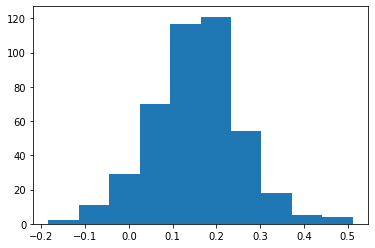

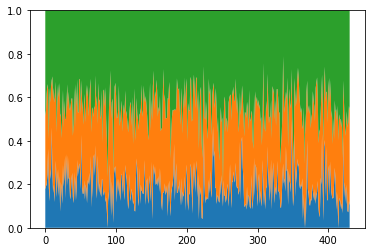

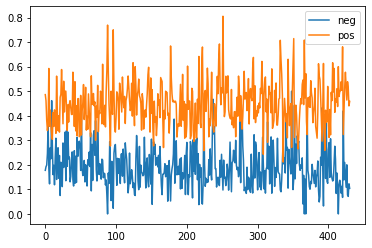

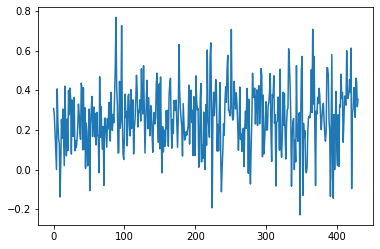

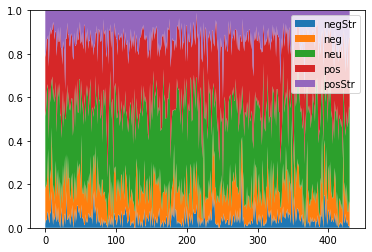

In [ ]:
import matplotlib.pyplot as plt

plt.hist(senti_df['com_sent'])
plt.show()


x = range(0,len(senti_df))
y_stack3 = stack_class3(senti_df)
plt.stackplot(x,y_stack3)
plt.ylim([0,1])
plt.show()

plt.plot(senti_df['neg'],label='neg')
plt.plot(senti_df['pos'],label='pos')
plt.legend()
plt.show()

y_diff = []
for index,row in senti_df.iterrows():
  y_diff.append(row['pos']-row['neg'])

plt.plot(y_diff)
plt.show()

y_stack5 = stack_class5(senti_df5)
plt.stackplot(x,y_stack5,labels=['negStr','neg','neu','pos','posStr'])
plt.ylim([0,1])
plt.legend()
plt.show()

In [ ]:
date=data["date"]
date = pd.to_datetime(date)
topic_num = [i+1 for i in df_dominant_topic['Dominant_Topic']] 
final_table = senti_df5.assign(date=date,topic=topic_num)
final_table['year'] = final_table['date'].dt.year
print(final_table)

#final_table.to_csv('/content/drive/MyDrive/final.csv')

     com_sent  posStrong       pos       neu       neg  negStrong       date  \
0    0.213064   0.214953  0.271028  0.336449  0.158879   0.018692 2004-07-27   
1    0.162438   0.192308  0.269231  0.346154  0.153846   0.038462 2005-01-06   
2    0.128638   0.132597  0.248619  0.419890  0.165746   0.033149 2005-06-04   
3    0.058342   0.132075  0.207547  0.415094  0.169811   0.075472 2005-10-25   
4    0.032159   0.113636  0.250000  0.272727  0.295455   0.068182 2005-12-15   
..        ...        ...       ...       ...       ...        ...        ...   
426  0.170591   0.187234  0.276596  0.336170  0.161702   0.038298 2017-01-10   
427  0.305635   0.269231  0.269231  0.384615  0.048077   0.028846 2017-01-12   
428  0.274451   0.157143  0.357143  0.414286  0.064286   0.007143 2017-01-16   
429  0.178719   0.128000  0.312000  0.437333  0.112000   0.010667 2017-01-18   
430  0.206646   0.125000  0.333333  0.437500  0.104167   0.000000 2017-01-20   

     topic  year  
0      1.0  2004  
1

## Outside sources

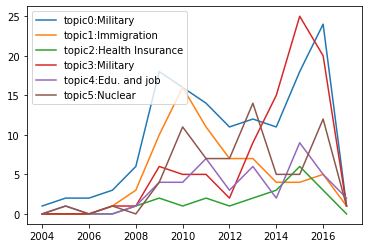

In [ ]:
#data_visual

df2 = documents.groupby(['topic','year']).size().unstack(fill_value=0).stack().to_frame().reset_index()
df2.columns = ['topic','year','count']
count1 = list(df2[df2['topic']==0]['count'])
count2 = list(df2[df2['topic']==1]['count'])
count3 = list(df2[df2['topic']==2]['count'])
count4 = list(df2[df2['topic']==3]['count'])
count5 = list(df2[df2['topic']==4]['count'])
count6 = list(df2[df2['topic']==5]['count'])

year = list(df2[df2['topic']==1]['year'])
plt.plot(year,count1,label='topic0:Military')
plt.plot(year,count2,label='topic1:Immigration')
plt.plot(year,count3,label='topic2:Health Insurance')
plt.plot(year,count4,label='topic3:Military')
plt.plot(year,count5,label='topic4:Edu. and job')
plt.plot(year,count6,label='topic5:Nuclear')
plt.legend()
plt.show()


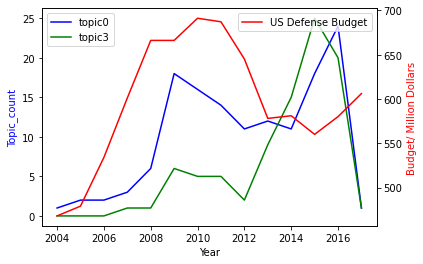

In [ ]:
#plot1 Denfense Budget
extra1=pd.read_csv('https://raw.githubusercontent.com/s853348481/MDA/main/MDA_datasets/USA-Defense-Budget.csv',header=None)
extra1.columns=['year','count']
_,ax=plt.subplots()
ax.plot(year,count1,'b',label='topic0')
ax.plot(year,count4,'g',label='topic3')
plt.legend(loc=2)
ax.set_xlabel('Year')
ax.set_ylabel('Topic_count',color='b')
ax2 = ax.twinx()
ax2.plot(year,extra1['count'],'r',label='US Defense Budget')
ax2.set_ylabel('Budget/ Million Dollars',color='r')
plt.legend(loc=1)
plt.show()

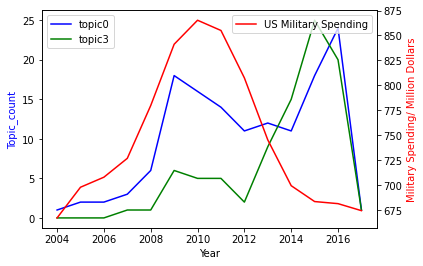

In [ ]:
#extra variates-US Military Spending
extra2=pd.read_csv('https://raw.githubusercontent.com/s853348481/MDA/main/MDA_datasets/USA-Military-Spending.csv',header=None)
extra2.columns=['year','military']
#plot2 Military Spending
_,ax=plt.subplots()
ax.plot(year,count1,'b',label='topic0')
ax.plot(year,count4,'g',label='topic3')
plt.legend(loc=2)
ax.set_xlabel('Year')
ax.set_ylabel('Topic_count',color='b')
ax2 = ax.twinx()
ax2.plot(year,extra2['military'],'r',label='US Military Spending')
ax2.set_ylabel('Military Spending/ Million Dollars',color='r')
plt.legend(loc=1)
plt.show()

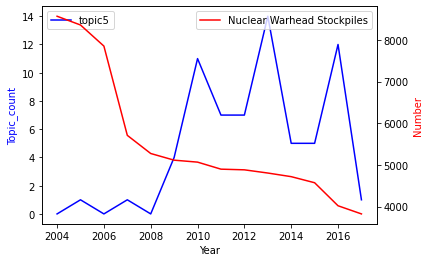

In [ ]:
#extra variates-US Nuclear Warhead Stockpiles
extra3=pd.read_csv('https://raw.githubusercontent.com/s853348481/MDA/main/MDA_datasets/USA-Nuclear-Warhead-Stockpiles.csv',header=None)
extra3.columns=['a','a','year','nuclear']
#plot3 Nuclear Warhead Stockpiles
_,ax=plt.subplots()
ax.plot(year,count6,'b',label='topic5')
plt.legend(loc=2)
ax.set_xlabel('Year')
ax.set_ylabel('Topic_count',color='b')
ax2 = ax.twinx()
ax2.plot(year,extra3['nuclear'],'r',label='Nuclear Warhead Stockpiles')
ax2.set_ylabel('Number',color='r')
plt.legend(loc=1)
plt.show()

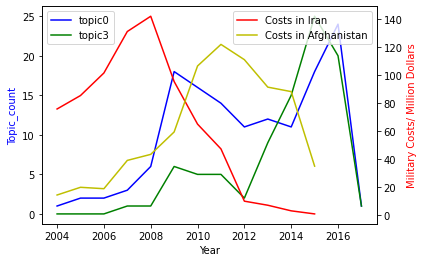

In [ ]:
#plot4 US costs in Iran and Afghanistan
extra4=pd.read_csv('https://raw.githubusercontent.com/s853348481/MDA/main/MDA_datasets/US%20costs%20in%20Iran%20and%20Afghanistan.csv',header=None)
extra4.columns=['year','Iran','Afghanistan']
_,ax=plt.subplots()
ax.plot(year,count1,'b',label='topic0')
ax.plot(year,count4,'g',label='topic3')
plt.legend(loc=2)
ax.set_xlabel('Year')
ax.set_ylabel('Topic_count',color='b')
ax2 = ax.twinx()
ax2.plot(extra4['year'],extra4['Iran'],'r',label='Costs in Iran')
ax2.plot(extra4['year'],extra4['Afghanistan'],'y',label='Costs in Afghanistan')
ax2.set_ylabel('Military Costs/ Million Dollars',color='r')
plt.legend(loc=1)
plt.show()

In [ ]:
#extra variates-Employment Rate
column_employment_rate=['62.3','62.7','63.1','63','62.2','59.3','58.5','58.4','58.6','58.6','59','59.3','59.7','60.1']
extra6=np.float64(column_employment_rate)
print(extra6)

[62.3 62.7 63.1 63.  62.2 59.3 58.5 58.4 58.6 58.6 59.  59.3 59.7 60.1]


In [ ]:
#extra variates-Immigrants as Percentage of the U.S. Population
column_immigrants_percentage=['11.8','12','12.1','12.3','12.3','12.4','12.9','13','13','13.1','13.3','13.5','13.5','13.7']
extra7=np.float64(column_immigrants_percentage)
print(extra7)

[11.8 12.  12.1 12.3 12.3 12.4 12.9 13.  13.  13.1 13.3 13.5 13.5 13.7]


In [ ]:
#extra variates-Number of Immigrants
column_immigrants_number=['468', '479', '534', '601', '666', '666', '691', '687', '645', '578', '581', '560', '580', '606']
extra8=np.float64(column_immigrants_number)
print(extra8)

[468. 479. 534. 601. 666. 666. 691. 687. 645. 578. 581. 560. 580. 606.]


In [ ]:
#extra variates-Number of people with health insurance in the United States
column_health_insurance_number=['249.41', '250.8', '251.61', '255.02', '256.7', '255.3', '256.6', '260.21', '263.17', '271.61', '283.2', '289.9', '292.3', '296.9']
extra9=np.float64(column_health_insurance_number)
print(extra9)

[249.41 250.8  251.61 255.02 256.7  255.3  256.6  260.21 263.17 271.61
 283.2  289.9  292.3  296.9 ]


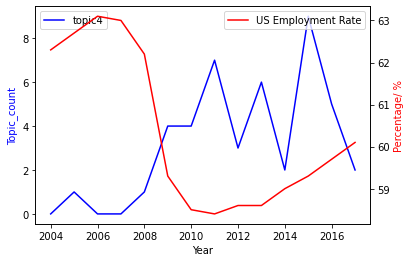

In [ ]:
#plot5 Employment Rate
_,ax=plt.subplots()
ax.plot(year,count5,'b',label='topic4')
plt.legend(loc=2)
ax.set_xlabel('Year')
ax.set_ylabel('Topic_count',color='b')

ax2 = ax.twinx()
ax2.plot(year,extra6,'r',label='US Employment Rate')
ax2.set_ylabel('Percentage/ %',color='r')
plt.legend(loc=1)
plt.show()

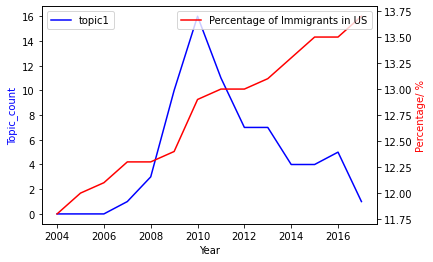

In [ ]:
#plot6 Immigrants as Percentage of the U.S. Population 
_,ax=plt.subplots()
ax.plot(year,count2,'b',label='topic1')
plt.legend(loc=2)
ax.set_xlabel('Year')
ax.set_ylabel('Topic_count',color='b')

ax2 = ax.twinx()
ax2.plot(year,extra7,'r',label='Percentage of Immigrants in US')
ax2.set_ylabel('Percentage/ %',color='r')
plt.legend(loc=1)
plt.show()
#Analyze the change in the slope of the red line

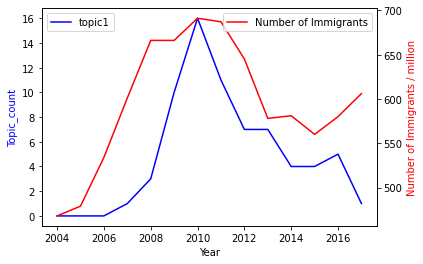

In [ ]:
#plot7 Number of Immigrants
_,ax=plt.subplots()
ax.plot(year,count2,'b',label='topic1')
plt.legend(loc=2)
ax.set_xlabel('Year')
ax.set_ylabel('Topic_count',color='b')

ax2 = ax.twinx()
ax2.plot(year,extra8,'r',label='Number of Immigrants')
ax2.set_ylabel('Number of Immigrants / million',color='r')
plt.legend(loc=1)
plt.show()
#Analyze the change in the slope of the red line

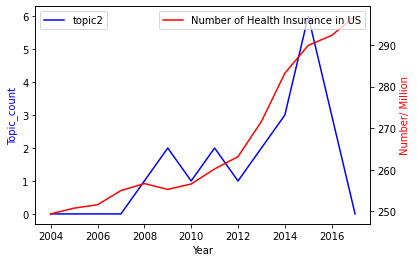

In [ ]:
#plot8 Number of people with health insurance in the United States
_,ax=plt.subplots()
ax.plot(year,count3,'b',label='topic2')
plt.legend(loc=2)
ax.set_xlabel('Year')
ax.set_ylabel('Topic_count',color='b')

ax2 = ax.twinx()
ax2.plot(year,extra9,'r',label='Number of Health Insurance in US')
ax2.set_ylabel('Number/ Million',color='r')
plt.legend(loc=1)
plt.show()
#Analyze the change in the slope of the red line